In [1]:
from google.colab import drive
drive.mount('/content/drive')
model_path = '/content/drive/My Drive/rfmodel.joblib'

Mounted at /content/drive


In [ ]:
# Load Random Forest Model
from joblib import load
model = load(model_path)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Load Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
file_path = '/content/drive/My Drive/data0199.csv'
df = pd.read_csv(file_path)
X = df.drop('agbd', axis=1)
y = df['agbd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
predictions = model.predict(X_test)

In [ ]:
# Get intrinsic feature importance
feature_importances = model.feature_importances_

feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

for name, importance in feature_importance_dict.items():
    print(f"{name}: {importance:.4f}")

# Ranking feature importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for name, importance in sorted_features:
    print(f"{name}: {importance:.4f}")

lat_lowestmode: 0.1937
lon_lowestmode: 0.1808
band_1_values: 0.0576
band_2_values: 0.0530
band_3_values: 0.0530
band_4_values: 0.0598
band_5_values: 0.0546
band_6_values: 0.0380
band_7_values: 0.0328
band_8_values: 0.0390
band_8a_values: 0.0353
band_9_values: 0.0510
band_11_values: 0.0752
band_12_values: 0.0761
lat_lowestmode: 0.1937
lon_lowestmode: 0.1808
band_12_values: 0.0761
band_11_values: 0.0752
band_4_values: 0.0598
band_1_values: 0.0576
band_5_values: 0.0546
band_3_values: 0.0530
band_2_values: 0.0530
band_9_values: 0.0510
band_8_values: 0.0390
band_6_values: 0.0380
band_8a_values: 0.0353
band_7_values: 0.0328


In [ ]:
X.columns

Index(['lat_lowestmode', 'lon_lowestmode', 'band_1_values', 'band_2_values',
       'band_3_values', 'band_4_values', 'band_5_values', 'band_6_values',
       'band_7_values', 'band_8_values', 'band_8a_values', 'band_9_values',
       'band_11_values', 'band_12_values'],
      dtype='object')

In [ ]:
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

new_column_names = ['Latitude', 'Longitude', 'Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7', 'Band8', 'Band8a', 'Band9', 'Band11', 'Band12']

# Get feature names
X.columns = new_column_names
feature_names = X.columns[indices]

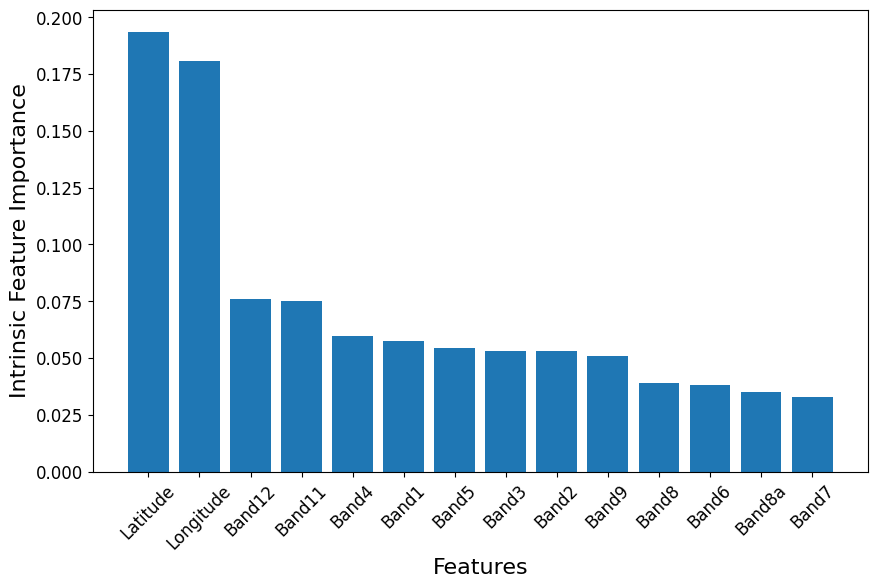

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Intrinsic Feature Importance', fontsize=16)

plt.show()

In [ ]:
# Caluculate permutation feature importance score

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42)

for i in perm_importance.importances_mean.argsort()[::-1]:
    if perm_importance.importances_mean[i] - 2 * perm_importance.importances_std[i] > 0:
        print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.4f}")

Longitude: 0.6215
Latitude: 0.5350
Band12: 0.1371
Band11: 0.1174
Band4: 0.0560
Band3: 0.0471
Band5: 0.0450
Band9: 0.0440
Band2: 0.0372
Band1: 0.0362
Band8: 0.0294
Band7: 0.0286
Band6: 0.0269
Band8a: 0.0244


In [ ]:
importances = perm_importance.importances_mean
std_devs = perm_importance.importances_std

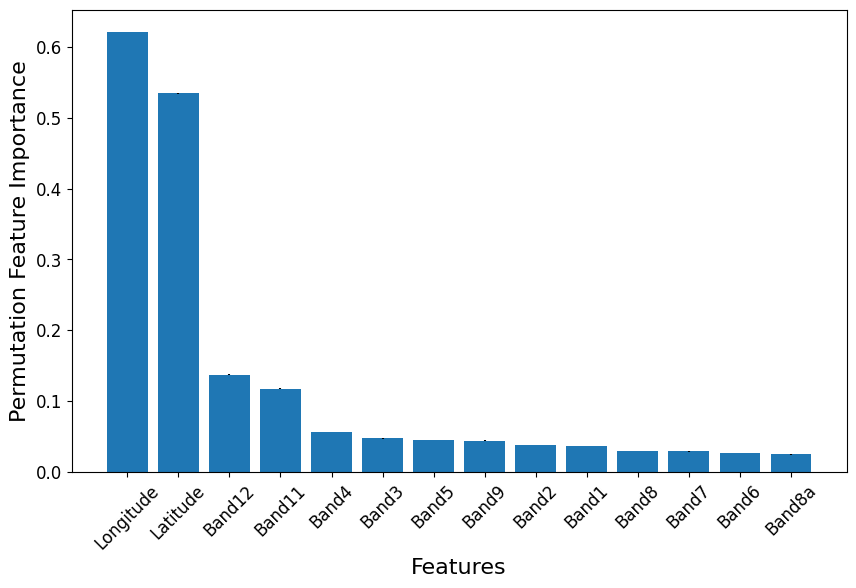

In [ ]:
#Plot

feature_names = new_column_names
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_std_devs = std_devs[sorted_indices]
sorted_features = [feature_names[i] for i in sorted_indices]


plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, yerr=sorted_std_devs)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Features', fontsize=16)
plt.ylabel('Permutation Feature Importance', fontsize=16)
plt.show()